# Background

This project aims for verifying correlation between spread of COVID-19 and movement of global stock indices. In global-scale analysis, it is my intention to understand trend of market fluctuation. While COVID-19 was extremely powerful variable that affects macroeconomy in 2020, it enables me to apply the model that simplifies algorithm.

# Literature Review

The paper `Principal Components as a Measure of Systemic Risk` written by Kritzman et al. (2010) [[1]](https://doi.org/10.3905/jpm.2011.37.4.112) introduces the creative way to use Principal Component Analysis as a method to measure systemic risk. _Principal Component Analysis (PCA)_ is a feature-extraction technique to apply an orthogonal transformation into simpler dimensional data. This technique simplifies data while preserving almost all information. Because this technique lets uncorrelated variables into the correlated ones, this model becomes more efficient if there is stronger correlation between variables. Therefore, principal components efficiently represent how variables are correlated.

## Systemic Risk

Systemic Risk defines a ratio of systematic risk to idiosyncratic risk. Because systematic risk describes risk that is shared by entire market, idiosyncratic risk is about specific part of market. In other words, systemic risk measures how fragile the market is. According to the paper of Kritzman et al. (2010):

> "the absorption ratio, which equals the fraction of the total variance of a set of asset returns explained or “absorbed” by a fixed number of eigenvectors. The absorption ratio captures the extent to which markets are unified or tightly coupled. When markets are tightly coupled, they are more fragile in the sense that negative shocks propagate more quickly and broadly than when markets are loosely linked." 

Therefore, in this project, I intend to calculate `explained variance`, or the `absorption ratio`. However, in this project, I intend to concentrate on how variables are correlated in the market. If COVID-19 is a variable that has strong impact to explain price fluctuation of market, it should have higher correlation.

## PCA Loadings

Intuitively speaking, Principal Component Analysis is a technique to reduce dimensionality. Smaller dimension of features can be achieved by a linear combination of columns, which explain the maximum variation explained. This concept is what we used to understand `correlation` and `systemic risk` in the previous section of analysis. Each Principal Component Loading is an example of `unit vector`.

$$
u := \min(\frac{1}{n} \sum_{i}^{n}(x_{i}^{T}x_{i} - (u_{1}^{T}x_{i})^{2}))
$$

Principal Component Analysis aims for minimizing total distance of a unit vector whose perpendicular distance is minimized as a result. And it is the eigenvector of the covariance matrix of $X$.

$$
Av = \lambda v
$$

# Preprocessing Data

* The language that I use is Python. I use __Jupyter Notebook IDE__.

* I pre-defined a number of functions and imported a number of libraries. I also set my own design for matplotlib graph.

* The following code imports necessary libraries 

In [1]:
# Load Packages

import yfinance as yf
import csv
import pandas as pd
import numpy as np
from datetime import date, time, timedelta
import datetime
from countryinfo import CountryInfo
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from datapackage import Package
from sklearn.cluster import KMeans

today = datetime.today()
yesterday = str(today - timedelta(2))[:10]

# Convert Date
def date_convert(dates):
    dates_return = []
    
    for date in dates:
        date = date.split("/")
        year = '20' + str(date[2])
        month = str(date[0])
        day = str(date[1])
        
        if int(month) < 10:
            month = '0' + month
        
        if int(day) < 10:
            day = '0' + day
        
        date = year + "-" + month + "-" + day
        dates_return.append(date)
    
    return dates_return

start = "2020-01-01"
end = "2021-01-01"

# Matplotlib 
import matplotlib.pyplot as plt
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
np.set_printoptions(suppress=True)

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use('seaborn-pastel')
plt.rcParams['lines.linewidth'] = 1
plt.figure(dpi=300)
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True
plt.tight_layout()

<Figure size 4800x3600 with 0 Axes>

## Import 40 Global Stock Indices

This part of code imports __40 Global Indices__ as a representation of how global market has worked during 2020 since the outbreak of Coronavirus.

In [2]:
# Import Market Indices
SPY = yf.download("SPY", start, end)['Adj Close'].to_frame()
Singapore = yf.download("^STI", start, end)['Adj Close'].to_frame()
Dow = yf.download("^DJI", start, end)['Adj Close'].to_frame()
Nasdaq = yf.download("^IXIC", start, end)['Adj Close'].to_frame()
FTSE100 = yf.download("^FTSE", start, end)['Adj Close'].to_frame()
FTSE250 = yf.download("^FTSE", start, end)['Adj Close'].to_frame()
FTSE350 = yf.download("^FTLC", start, end)['Adj Close'].to_frame()
FTAI = yf.download("^FTAI", start, end)['Adj Close'].to_frame()
N225 = yf.download("^N225", start, end)['Adj Close'].to_frame()
N500 = yf.download("^N500", start, end)['Adj Close'].to_frame()
N1000 = yf.download("^N1000", start, end)['Adj Close'].to_frame()
HSI = yf.download("^HSI", start, end)['Adj Close'].to_frame()
Taiwan = yf.download("^TWII", start, end)['Adj Close'].to_frame()
SSE = yf.download("000001.SS", start, end)['Adj Close'].to_frame()
Shenzhen = yf.download("399001.SZ", start, end)['Adj Close'].to_frame()
DAX = yf.download("^GDAXI", start, end)['Adj Close'].to_frame()
France = yf.download("^FCHI", start, end)['Adj Close'].to_frame()
Indonesia = yf.download("^JKSE", start, end)['Adj Close'].to_frame()
PSEI = yf.download("PSEI.PS", start, end)['Adj Close'].to_frame()
AORD = yf.download("^AORD", start, end)['Adj Close'].to_frame()
AXJO = yf.download("^AXJO", start, end)['Adj Close'].to_frame()
AXKO = yf.download("^AXKO", start, end)['Adj Close'].to_frame()
kospi = yf.download("^KS11", start, end)['Adj Close'].to_frame()
kosdaq = yf.download("^KQ11", start, end)['Adj Close'].to_frame()
India = yf.download("^BSESN", start, end)['Adj Close'].to_frame()
NZ50 = yf.download("^NZ50", start, end)['Adj Close'].to_frame()
XAX = yf.download("^XAX", start, end)['Adj Close'].to_frame()
RUI = yf.download("^RUI", start, end)['Adj Close'].to_frame()
RUT = yf.download("^RUT", start, end)['Adj Close'].to_frame()
RUA = yf.download("^RUA", start, end)['Adj Close'].to_frame()
GSPTSE = yf.download("^GSPTSE", start, end)['Adj Close'].to_frame()
N100 = yf.download("^N100", start, end)['Adj Close'].to_frame()
N150 = yf.download("^N150", start, end)['Adj Close'].to_frame()
BFX = yf.download("^BFX", start, end)['Adj Close'].to_frame()
IMOEX = yf.download("IMOEX.ME", start, end)['Adj Close'].to_frame()
MERV = yf.download("^MERV", start, end)['Adj Close'].to_frame()
TA125 = yf.download("^TA125.TA", start, end)['Adj Close'].to_frame()
JN0U = yf.download("^JN0U.JO", start, end)['Adj Close'].to_frame()
AEX = yf.download("^AEX", start, end)['Adj Close'].to_frame()
ATOI = yf.download("^ATOI", start, end)['Adj Close'].to_frame()
BVSP = yf.download("^BVSP", start, end)['Adj Close'].to_frame()
MIB = yf.download("FTSEMIB.MI", start, end)['Adj Close'].to_frame()
ATX = yf.download("^ATX", start, end)['Adj Close'].to_frame()
ISEQ = yf.download("^ISEQ", start, end)['Adj Close'].to_frame()
NSEI = yf.download("^NSEI", start, end)['Adj Close'].to_frame()
MXX = yf.download("^MXX", start, end)['Adj Close'].to_frame()
SSMI = yf.download("^SSMI", start, end)['Adj Close'].to_frame()
STOXX50E = yf.download("^STOXX50E", start, end)['Adj Close'].to_frame()
MDAXI = yf.download("^MDAXI", start, end)['Adj Close'].to_frame()
SDAXI = yf.download("^SDAXI", start, end)['Adj Close'].to_frame()
HSCC = yf.download("^HSCC", start, end)['Adj Close'].to_frame()
HSCE = yf.download("^HSCE", start, end)['Adj Close'].to_frame()
KLSE = yf.download("^KLSE", start, end)['Adj Close'].to_frame()

# Transform into Dataframe
df = pd.concat([
    Dow, 
    Nasdaq, 
    FTSE100, 
    FTSE250, 
    FTAI, 
    N225, 
    SSE, 
    Shenzhen, 
    DAX, 
    France, 
    Indonesia, 
    PSEI, 
    AXKO,
    kospi, 
    kosdaq,
    NZ50,
    RUI, 
    RUT, 
    RUA, 
    GSPTSE,  
    N100, 
    N150, 
    BFX, 
    IMOEX, 
    MERV, 
    TA125, 
    JN0U, 
    SPY, 
    Singapore, 
    AEX, 
    ATOI,
    BVSP,
    MIB,
    ATX,
    ISEQ,
    MXX,
    STOXX50E,
    MDAXI,
    SDAXI,
    KLSE
], axis=1)

# Set Columns
df.columns=[
    'US-Dow', 
    'US-Nasdaq', 
    'GB-FTSE100', 
    'GB-FTSE250', 
    'GB-FTAI', 
    'JP-N225', 
    'CN-SSE', 
    'CN-Shenzhen', 
    'DE-DAX', 
    'FR-FCHI', 
    'ID-JKSE', 
    'PH-PSEI', 
    'AU-AXKO',
    'KR-KSII', 
    'KR-KQII',
    'NZ-NZ50',
    'US-RUI', 
    'US-RUT', 
    'US-RUA', 
    'CA-GSPTSE', 
    'FR-N100', 
    'FR-N150', 
    'BE-BFS', 
    'RU-IMOEX', 
    'AR-MERV', 
    'IL-TA125', 
    'ZA-JN0U', 
    'US-SPX', 
    'SG-STI', 
    'NL-AEX', 
    'AU-ATOI',
    'BR-BVSP',
    'IT-MIB',
    'AT-ATX',
    'IE-ISEQ',
    'MX-MXX',
    'DE-Stoxx50E',
    'DE-MDAXI',
    'DE-SDAXI',
    'MY-KLSE'
]

# Eliminate Missing Values
daily_return = df.fillna(method='ffill').fillna(method='bfill')
daily_return = daily_return[2:]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Import Coronavirus Confirmation Trend

In [3]:
# COVID-19 Dataset

states_url = "https://covidtracking.com/api/states/daily"
us_url = "https://covidtracking.com/api/us/daily"
case_threshold = 100

cases = ["confirmed", "deaths", "recovered"]
sheet = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_"
suffix = "_global.csv"
df_list = []

url_confirmed = sheet + "confirmed" + suffix

df_confirmed = pd.read_csv(url_confirmed, header=0, escapechar="\\")
df_confirmed1 = df_confirmed.drop(columns=["Lat", "Long"])
df_confirmed = df_confirmed.drop(columns=["Lat", "Long"])

df_confirmed = df_confirmed.groupby("Country/Region").agg("sum").T
df_confirmed1 = df_confirmed1.groupby("Province/State").agg("sum").T

# Preprocess Data
dates = df_confirmed.index.tolist()
dates = date_convert(dates)
US = df_confirmed["US"].tolist()
China = df_confirmed["China"].tolist()
Germany = df_confirmed["Germany"].tolist()
Japan = df_confirmed["Japan"].tolist()
UK = df_confirmed["United Kingdom"].tolist()
Korea = df_confirmed["Korea, South"].tolist()
Australia = df_confirmed["Australia"].tolist()
Austria = df_confirmed["Austria"].tolist()
Denmark = df_confirmed["Denmark"].tolist()
Greece = df_confirmed["Greece"].tolist()
Finland = df_confirmed["Finland"].tolist()
Ireland = df_confirmed["Ireland"].tolist()
Italy = df_confirmed["Italy"].tolist()
SouthAfrica = df_confirmed["South Africa"].tolist()
Spain = df_confirmed["Spain"].tolist()
Singapore = df_confirmed["Singapore"].tolist()
Russia = df_confirmed["Russia"].tolist()
NewZealand = df_confirmed["New Zealand"].tolist()
Canada = df_confirmed["Canada"].tolist()
France = df_confirmed["France"].tolist()
Netherlands = df_confirmed["Netherlands"].tolist()
Mexico = df_confirmed["Mexico"].tolist()
Brazil = df_confirmed["Brazil"].tolist()
Philippines = df_confirmed["Philippines"].tolist()
India = df_confirmed["India"].tolist()
Argentina = df_confirmed["Argentina"].tolist()
Indonesia = df_confirmed["Indonesia"].tolist()
Malaysia = df_confirmed["Malaysia"].tolist()
Israel = df_confirmed["Israel"].tolist()
Poland = df_confirmed["Poland"].tolist()
Afghanistan = df_confirmed["Afghanistan"].tolist()

data = [
    US, China, Japan, 
    Korea, Australia, Austria, 
    Germany, UK, Denmark, 
    Greece, Italy, SouthAfrica, 
    Spain, Singapore, Russia, 
    NewZealand, Canada, France, 
    Netherlands, Mexico, Philippines, 
    India, Argentina, Indonesia, 
    Malaysia, Israel, Poland, 
    Brazil, Spain
]

# Country Codes
country_codes = [
    "US", "CN", "JP", 
    "KR", "AU", "AT", 
    "DE", "GB", "DK", 
    "GR", "IT", "ZA", 
    "ES", "SG", "RU", 
    "NZ", "CA", "FR", 
    "NL", "MX", "PH", 
    "IN", "AR", "ID", 
    "MY", "IL", "PL", 
    "BR", "ES"
]

## Normalization

Normalizing data into the gaussian format is required to go for the analysis. Because chart is right-skewed for COVID-19 confirmed data, as more confirms arise in the period that is larger than previous one, I prefer using `apply(np.log)` rather than `apply(np.exp)` in normalization.

In [4]:
daily_confirmed = pd.DataFrame(data, index=country_codes, columns=dates).T.diff(1).replace([np.nan, np.inf, -np.inf], np.nan).fillna(0)

for code in country_codes:
    population = CountryInfo(code).population()
    daily_confirmed[code] = daily_confirmed[code].div(population, axis=0)
    
daily_confirmed = daily_confirmed.cumsum()[1:]

daily_return = daily_return.apply(np.log).diff(1)[1:]

# Principal Component Analysis

## Eigenvalues for each Component for Market Indice

While Principal Component Analysis provides two eigenvectors - or two principal components - we also have two eigenvalues that correspond to each vector. Comparison of these values can provide us with how the trend of market indice and that of COVID-19 are correlated.

Principal Components [0.61 0.09]


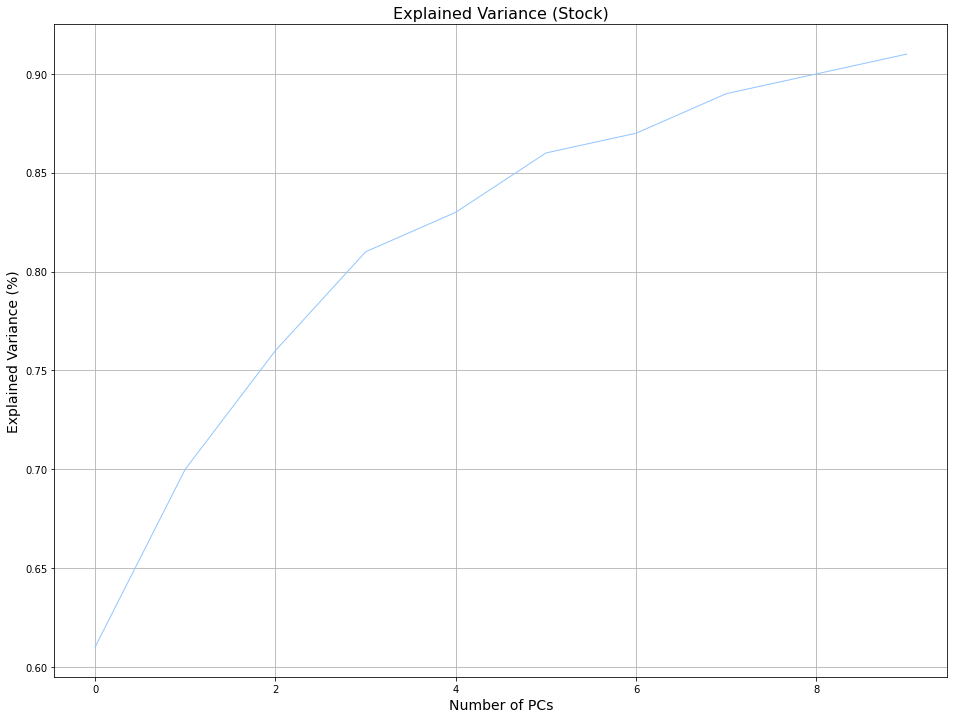

In [5]:
pca_stock = PCA(2).fit(daily_return)
daily_return_factors = pd.Series(index=daily_return.columns, data=pca_stock.components_[0])
print("Principal Components", pca_stock.explained_variance_ratio_.round(2))

variance_stock = PCA(10).fit(daily_return).explained_variance_ratio_.cumsum().round(2)
plt.plot(variance_stock)
plt.title('Explained Variance (Stock)', fontsize = 16)
plt.xlabel('Number of PCs', fontsize = 14)
plt.ylabel('Explained Variance (%)', fontsize = 14)
plt.show()

## Eigenvalues for each Component for COVID-19

Principal Components [0.98 0.01]


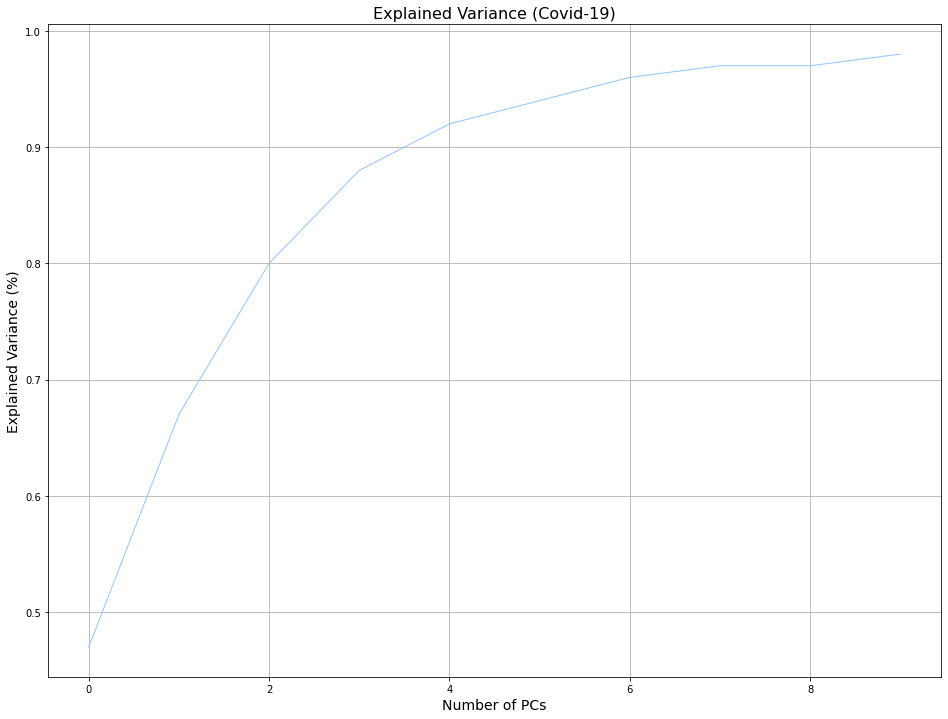

In [6]:
pca_covid = PCA(2).fit(daily_confirmed)
daily_confirmed = daily_confirmed.diff(1)[1:]
daily_confirmed_factors = pd.Series(index=daily_confirmed.columns, data=pca_covid.components_[0])
daily_confirmed_factors
print ("Principal Components", pca_covid.explained_variance_ratio_.round(2))

variance_covid = PCA(10).fit(daily_confirmed).explained_variance_ratio_.cumsum().round(2)
plt.plot(variance_covid)
plt.title('Explained Variance (Covid-19)', fontsize = 16)
plt.xlabel('Number of PCs', fontsize = 14)
plt.ylabel('Explained Variance (%)', fontsize = 14)
plt.show()

## Analysis

### Comparison of Explained Variance

While two principal components for global stock indices explain approximately $60\%$ of market fluctuation, those for global _COVID-19_ confirmation explain almost entire ($100\%$) of trend. This result implies that the spread of Coronavirus has been very predictable during 2020-2021 period whereas the flcutuation of market indices has not been as predictable as Coronavirus spread in the same period. In other words, Coronavirus has been spread in very identical pattern across the country whereas the price fluctuation should be explained as combined with additional variables. In econometric terms, there's an `omitted variable bias` to predict the market flcutuation in this period.

### Degree of Impact from Coronavirus

We found corresponding each __eigenvalue__ for each component. In this part of experiment, I intend to compare the eigenvalue for each stock market indice during the period so that I can rank them in order. If principal components are higher, the variables become more relevant. Otherwise, they are less relevant. We assume that the largest factor to affect economic condition is COVID-19 in 2020, I would like to apply this assumption in developing the suggestion that the eigenvalue of each vector may represent how stock market has been influenced.

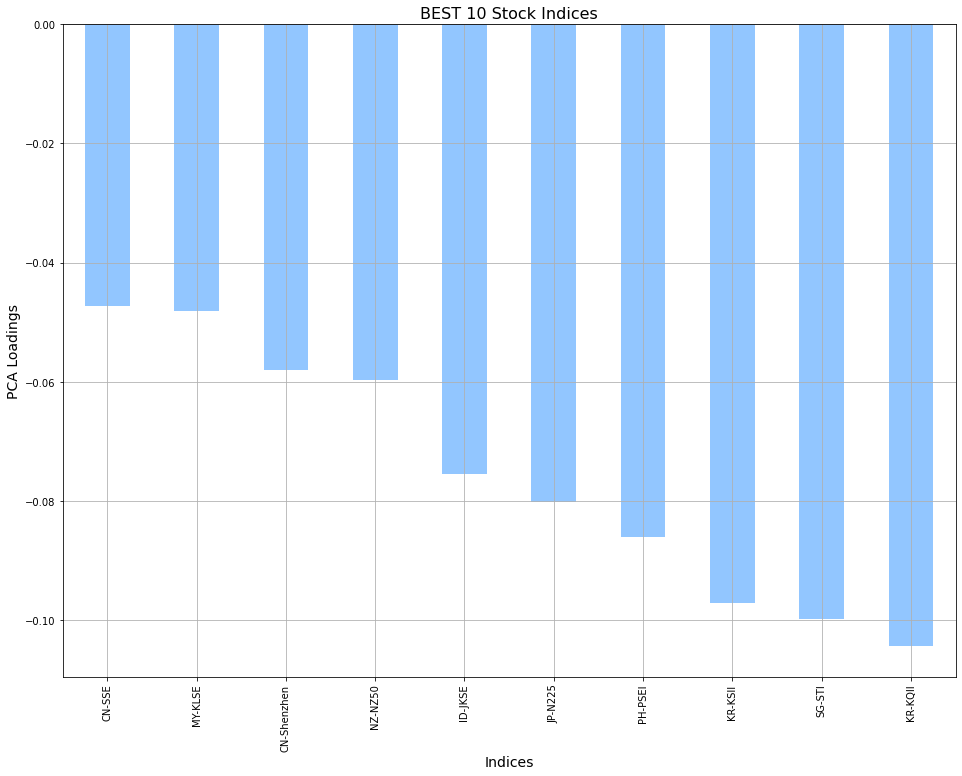

In [7]:
daily_return_factors.nlargest(10).plot.bar()
plt.title('BEST 10 Stock Indices', fontsize=16)
plt.xlabel('Indices', fontsize=14)
plt.ylabel('PCA Loadings', fontsize = 14)
plt.savefig('Best_10_Indices.png', dpi=300)

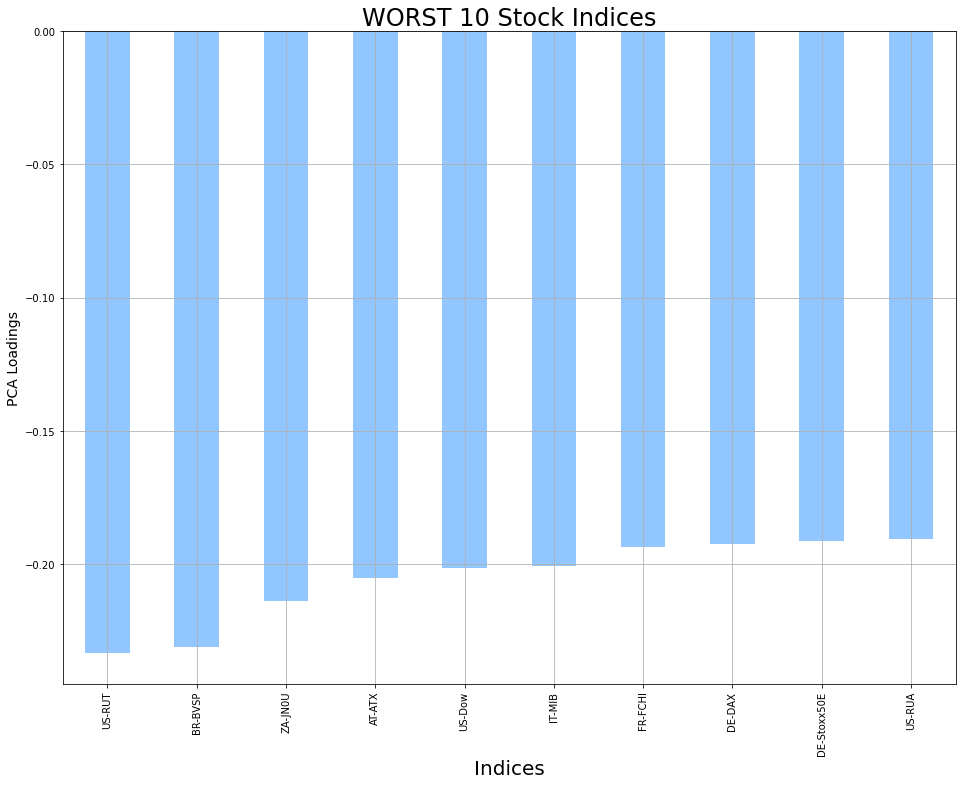

In [8]:
daily_return_factors.nsmallest(10).plot.bar()
plt.title('WORST 10 Stock Indices', fontsize=24)
plt.xlabel('Indices', fontsize=20)
plt.ylabel('PCA Loadings', fontsize = 14)
plt.savefig('Worst_10_Indices.png', dpi=300)

### Correlation

As a data scientist, I am happy to confirm that I am able to provide numerical evidence that stronger Coronavirus has resulted in worst impact on market fluctuation.

#### Best Indices

* Malaysia (KLSE)
* China (SSE, Shenzhen)
* New Zealand (NZ50)
* Indonesia (JKSE)
* Japan (N225)
* Philippines (PSEI)
* Singapore (STI)
* Korea (KSII, KQII)

#### Worst Indices

* United States (RUT, DOW, RUA)
* Brazil (BVSP)
* South Africa (ZNOU)
* Austria (ATX)
* Italy (MIB)
* France (FCHI)
* Germany (DAX, Stoxx50E)

Countries that include best-affected (in fact, least-negatively affected) are Malaysia, China, New Zealand, Indonesia, Japan, Philippines, Singapore, and Korea. They are the countries who contained Coronavirus better than other countries. On the comparison, countries that include worst-affected indices include United States, Brazil, South Africa, Austria, Italy, France, and Germany, and they are _mostly_ the countries who could not contain Coronavirus in 2020. In this part of experiment, we are able to confirm that there is a certain __correlation__ between the profiency in controlling Coronavirus and how market has performed.

This result, however, leaves certain limitation in this methodology. While our assumption is that the market in 2020 was influenced by `only Coronavirus` during 2020, there should be other variables. And therefore, there should be `omitted variable bias` that has distorted the result. And furthermore, the result obviously represents some distortions. For instance, Germany's indices are low-ranked, but Germany was one of the best countries who controlled Coronavirus. Also, a number of USA's indices seem to be dispersed across the ranks - which means the `country` is not the only factor to explain the market performance.

# K-means Clustering

It is my intention to extract new insights and sources of new question. I thus implemented another machine learning algorithm, `K-means Clustering`, to cluster a range of countries. Simply put, K-Means Clustering is an algorithm to cluster data points by making `smallest distances` between data points. As a result, we are able to see how each data shares __similarity__ with others. Because the experiment is based on the country-based comparison, it is a great tool to visualize and simplify our intuition.

In [9]:
df1 = pd.DataFrame(daily_return_factors)
df2 = pd.DataFrame(daily_confirmed_factors)

df_list = []

df1_temp = df1.T
df2_temp = df2.T

for index in df1_temp:
    nation = index.split("-")[0]
    indice = index.split("-")[1]
    factor_return = df1_temp[index]
    try:
        factor_input = df2_temp[nation]
    except:
        factor_input = df2_temp['FR'] + df2_temp['DE'] / 2
    
    df_list.append(
        [nation, 
         indice, 
         index, 
         factor_input.values[0], 
         factor_return.values[0]
        ]
    )

df = pd.DataFrame(
    df_list,
    columns=["Country", "Index", "Full-Name", "Confirmed", "Return"]
)

index = df.iloc[:,1].values.tolist()
df_default = df
df = df[['Confirmed', 'Return']]
df.index = index

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

sse = []

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=100,
    max_iter=300,
    random_state=42
)

kmeans.fit(df)

print("The lowest SSE:", kmeans.inertia_)
print("Final Centroids:", kmeans.cluster_centers_)
print("Number of Iterations Required:", kmeans.n_iter_)

a = df[kmeans.labels_== 0]
b = df[kmeans.labels_== 1]
c = df[kmeans.labels_== 2]

a = a.index.values.tolist()
b = b.index.values.tolist()
c = c.index.values.tolist()

groups = pd.DataFrame([a, b, c], index=['Group A', 'Group B', 'Group C'])
groups = groups.T

The lowest SSE: 0.09914731110330381
Final Centroids: [[ 0.13517079 -0.17463969]
 [ 0.01900892 -0.08634119]
 [ 0.32342671 -0.18158958]]
Number of Iterations Required: 4


## Clusters

There are three clusters, A, B, and C

In [10]:
groups

,Group A,Group B,Group C
0,DAX,N225,Dow
1,GSPTSE,SSE,Nasdaq
2,IMOEX,Shenzhen,FTSE100
3,JN0U,JKSE,FTSE250
4,Stoxx50E,PSEI,FTAI
5,MDAXI,AXKO,FCHI
6,SDAXI,KSII,RUI
7,None,KQII,RUT
8,None,NZ50,RUA
9,None,STI,N100


## Scatterplot

Another way to gain intuitive understanding is using scatterplot. I here visualize to complement K-means cluster technique performed above.

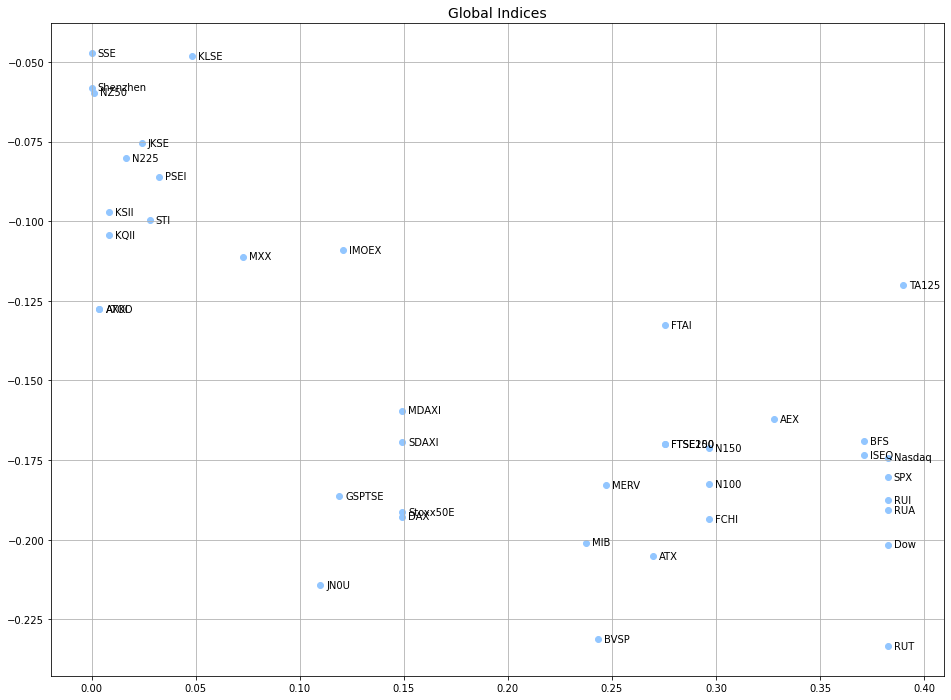

In [11]:
fig = plt.scatter(df[['Confirmed']].values, df[['Return']].values)

labels = df.index.tolist()

for x_pos, y_pos, label in zip(df[['Confirmed']].values, df[['Return']].values, labels):
    plt.annotate(label,
                 xy = (x_pos, y_pos),
                 xytext=(6,0),
                 textcoords='offset points',
                 ha='left',
                 va='center'
                )

plt.title("Global Indices", fontsize = 14)
plt.savefig('Global_Indices.png', dpi=300)

# Generalized Linear Model

Finally, I use generalized linear model, which is to have statistical regression to confirm correlation between spread of Coronavirus and trend of performance of market indices.

In [12]:
import statsmodels.formula.api as smf

GLSAR = smf.glm(
    data=df,
    formula='Return~Confirmed'
    ).fit()

GLSAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Return   No. Observations:                   40
Model:                            GLM   Df Residuals:                       38
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                       0.0013749
Method:                          IRLS   Log-Likelihood:                 76.055
Date:                Thu, 27 May 2021   Deviance:                     0.052247
Time:                        15:50:37   Pearson chi2:                   0.0522
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1001      0.010    -10.248      0.000      -0.119      -0.081
Confirmed     -0.2574      0.041     -6.309      0.000      -0.337      -0.177
==============================================================================
"""

# Summary

## Principal Component Analysis

As a result of Principal Component Analysis, I find that (1) variables regarding market fluctuation are more complex than the spread of Coronavirus, as the gap of `explained variance` between Coronavirus and Market Fluctuation explicitly prove. Furthermore, (2) the impact of outward variable, presumably Coronavirus, has affected the countries who contained Coronavirus better.

## K-means Clustering

In k-means clustering, I derived straightforward, intuitive data that clusters countries by market performance. While Group B contains the countries who contained Coronavirus relatively better, other groups provide other examples. That being said, clusters explictly show that there is strong correlationship between capability to contain Coronavirus and market performance.

## Generalized Linear Model

GLM is a linear model to check the relationship between capability to contain virus and market performance. While $P > |Z| \approx 0$, which is smaller than $0.05\%$. And hence negative coefficient of $\text{confirmed} \approx -0.26$ is statistically significant value to suppose the correlation bewteen market performance and the spread of Coronavirus.

# Findings and Limitation

All of Principal Component Analysis, K-means Clustering, and Generalized Linear Model prove that there is strong correlation bewteen capability to contain Coronavirus and the trend of stock indices. However, this experiment is limited in its methodology to conduct single-variate analysis. While social issues are almost always multivariate, the simple models that I conducted in this experiment do not have sufficient explanatory power to derive strong arguments. While it is true that Coronavirus is very powerful variable to explain the year of 2020, the models should be more precise as a result. As American market indices, whose corresponding eigenvalues are widely dispersed, the spread of Coronavirus in the specific country is not the only variable to make precise analysis. In further research, it is desirable to prove `casuality`, which is different from correlation, through more precise, multi-variate analysis methodology.

# Bibliography

[1] Kritzman, Mark and Li, Yuanzhen and Page, Sebastien and Rigobon, Roberto, Principal Components as a Measure of Systemic Risk (June 30, 2010). MIT Sloan Research Paper No. 4785-10, https://doi.org/10.3905/jpm.2011.37.4.112, Available at SSRN: https://ssrn.com/abstract=1633027 or http://dx.doi.org/10.2139/ssrn.1633027